<a href="https://colab.research.google.com/github/paulandrea0/Qualifica-LPC/blob/main/CrossValidation_Copia_de_LPC_Clasificador_MLPerseptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# **Cargando Datos LPC de los sismos**

(1728, 13)
9.3221 -9.494
(256, 12) (1472, 12)
(40, 12) (362, 12)
(6, 12) (61, 12)
6.4644 -6.6297


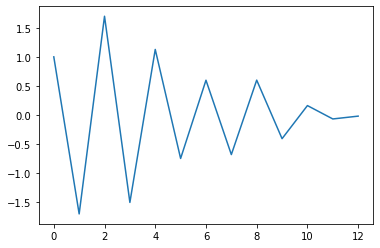

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as signal
import math
from math import floor
from scipy import signal
from scipy.signal import lfilter, resample
from scipy.signal.windows import hann
from numpy.random import randn 

VT =  pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/LPC_VT')
LP =  np.array(pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/LPC_LP'))
Tor = np.array(pd.read_csv('/gdrive/MyDrive/Sismos/LPC Sismos/LPC_Tor'))

VT = VT.dropna()
print(VT.shape)
VT = np.array(VT)
print(np.max(VT), np.min(VT))

LPC_test_1 = VT[1472:1728, 1:13]
LPC_train_1 = VT[0:1472, 1:13] 
LPC_test_2 = LP[362:402, 1:13]
LPC_train_2 = LP[0:362, 1:13]
LPC_test_3 = Tor[61:67, 1:13]
LPC_train_3 = Tor[0:61, 1:13]

print(LPC_test_1.shape, LPC_train_1.shape)
print(LPC_test_2.shape, LPC_train_2.shape)
print(LPC_test_3.shape, LPC_train_3.shape)

print(np.max(LP), np.min(LP))
plt.plot(VT[67])


# Representaciones de menor Dimensión

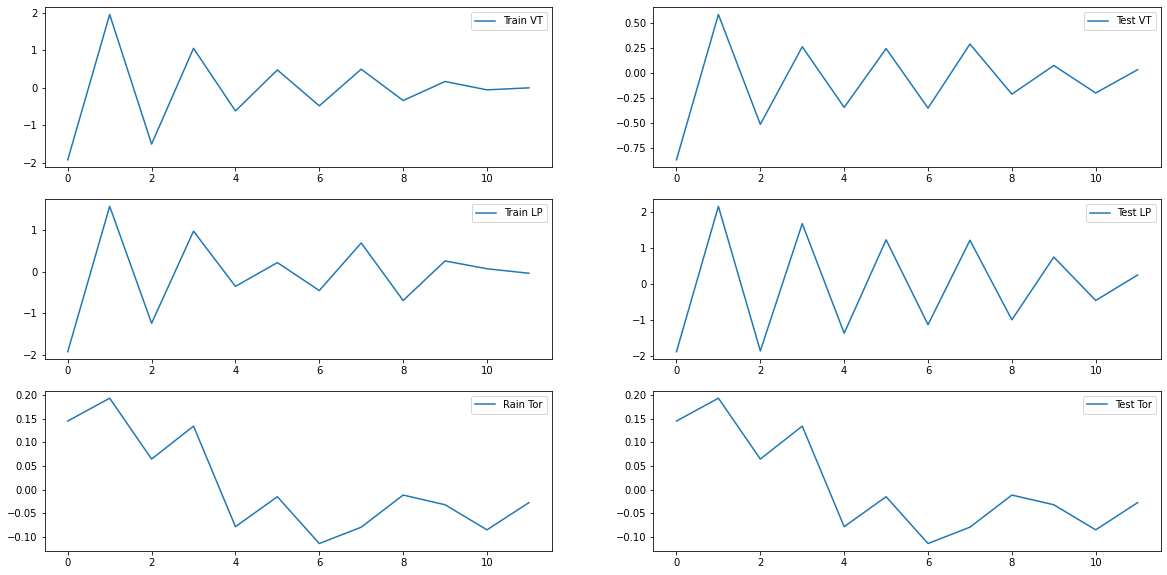

In [ ]:
# Observamos cómo el modelo LPC consigue representar 

dato = 4    # Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(LPC_train_1[dato])
plt.legend(labels=["Train VT"])
plt.subplot(3,2,2)
plt.plot(LPC_test_1[dato])
plt.legend(labels=["Test VT"])
plt.subplot(3,2,3)
plt.plot(LPC_train_2[dato])
plt.legend(labels=["Train LP"])
plt.subplot(3,2,4)
plt.plot(LPC_test_2[dato])
plt.legend(labels=["Test LP"])
plt.subplot(3,2,5)
plt.plot(LPC_train_3[dato])
plt.legend(labels=["Rain Tor"])
plt.subplot(3,2,6)
plt.plot(LPC_test_3[dato])
plt.legend(labels=["Test Tor"])

# **Classificação com MLPerceptron**

**Normalización de las representaciones**

Mínimo y máximo originales: -7.9, 7.7
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -6.6, 6.5
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -0.1, 0.2
Mínimo y máximo normalizado: 0.0, 0.0
12


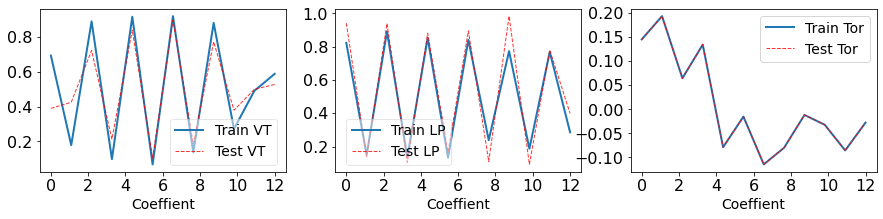

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
LPC_train_s1 = min_max_scaler.fit_transform(LPC_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(LPC_train_1), np.max(LPC_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(LPC_train_s1), np.max(LPC_train_s1))) 
LPC_test_s1 = min_max_scaler.transform(LPC_test_1)  

# Señales LP
LPC_train_s2 = min_max_scaler.fit_transform(LPC_train_2)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(LPC_train_2), np.max(LPC_train_2)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(LPC_train_s2), np.max(LPC_train_s2))) 
LPC_test_s2 = min_max_scaler.transform(LPC_test_2)  

# Señales Tor
LPC_train_s3 = min_max_scaler.fit_transform(LPC_train_3)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(LPC_train_3), np.max(LPC_train_3)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(LPC_train_s3), np.max(LPC_train_s3))) 
LPC_test_s3 = min_max_scaler.transform(LPC_test_3)  

# Graficando
fs = 12 # frecuencia de muestreo
n3 = LPC_train_s1.shape[1]
t3 = np.linspace(0,fs,n3) # creando un vector de tiempo
print(len(t3))

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.plot(t3, LPC_train_s1[60], lw=2, label="Train VT")
plt.legend(fontsize='14', loc='lower left', bbox_to_anchor=(0.5, 0.), fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(132)
plt.plot(t3, LPC_train_s2[18], lw=2, label="Train LP")
plt.legend(fontsize='14', loc='lower right', bbox_to_anchor=(0.5, 0.), fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(133) 
plt.plot(t3, LPC_train_3[38], lw=2, label="Train Tor")
plt.legend(fontsize='14')
plt.xticks(fontsize=16), plt.yticks(fontsize=16)



plt.subplot(131)
plt.plot(t3, LPC_test_s1[44], 'r--', alpha=0.8, lw=1, label="Test VT")
plt.legend(fontsize='14', loc='lower left', bbox_to_anchor=(0.5, 0.), fancybox=True, framealpha=0.5)
plt.xlabel('Coeffient', fontsize='14')
plt.subplot(132)
plt.plot(t3, LPC_test_s2[34], 'r--', alpha=0.8, lw=1, label="Test LP")
plt.legend(fontsize='14', loc='lower right', bbox_to_anchor=(0.5, 0.), fancybox=True, framealpha=0.5)
plt.xlabel('Coeffient', fontsize='14')
plt.subplot(133)
plt.plot(t3, LPC_test_3[4], 'r--', alpha=0.8, lw=1, label="Test Tor")
plt.legend(fontsize='14')
plt.xlabel('Coeffient', fontsize='14')

plt.savefig('caracter_LPC.pdf', dpi=400, format='pdf')

Preparando los datos para ser presentados en el clasificador

In [ ]:
# a continuación son adicionadas tres columnas que me permitirán ser usadas de etiquetas para los tipos de sismos
D_train_s1 = np.insert(LPC_train_s1, [0], (1,0,0), axis=1)
D_test_s1 = np.insert(LPC_test_s1, [0], (1,0,0), axis=1)
D_train_s2 = np.insert(LPC_train_s2, [0], (0,1,0), axis=1)
D_test_s2 = np.insert(LPC_test_s2, [0], (0,1,0), axis=1)
D_train_s3 = np.insert(LPC_train_s3, [0], (0,0,1), axis=1)
D_test_s3 = np.insert(LPC_test_s3, [0], (0,0,1), axis=1)

print(D_train_s1[1,0:5], D_test_s1[1,0:5])
print(D_train_s2[1,0:5], D_test_s2[1,0:5])
print(D_train_s3[1,0:5], D_test_s3[1,0:5])
print(D_train_s1[1,0:5], D_test_s1[1,0:5])
print(D_train_s2[1,0:5], D_test_s2[1,0:5])
print(D_train_s3[1,0:5], D_test_s3[1,0:5])

# Creo mi set de entrenamiento con sismos y sus etiquetas correspondientes y lo mismo para mi set de prueba
set_train = np.concatenate([D_train_s1,D_train_s2, D_train_s3], axis=0) 
set_test = np.concatenate([D_test_s1,D_test_s2, D_test_s3], axis=0) 
y_vector = np.concatenate([set_train, set_test])
y_vector = y_vector[:,0:3]
# le doy una mezcla a los datos para que entren en desorden en la red neuronal
np.random.shuffle(set_train)
np.random.shuffle(set_test)

print(set_train.shape, set_test.shape)

[1.         0.         0.         0.57654643 0.28845332] [1.         0.         0.         0.75826786 0.20120714]
[0.         1.         0.         0.4566784  0.35696868] [0.         1.         0.         0.69219434 0.19819599]
[0. 0. 1. 0. 0.] [0. 0. 1. 0. 0.]
[1.         0.         0.         0.57654643 0.28845332] [1.         0.         0.         0.75826786 0.20120714]
[0.         1.         0.         0.4566784  0.35696868] [0.         1.         0.         0.69219434 0.19819599]
[0. 0. 1. 0. 0.] [0. 0. 1. 0. 0.]
(1895, 15) (302, 15)


In [ ]:
print(set_train.shape, set_test.shape)
y_train, X_train =  set_train[:,0:3], np.delete(set_train, range(0, 3), axis=1)
y_test, X_test = set_test[:,0:3], np.delete(set_test, range(0, 3), axis=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_train[1,0:5], X_train[1,0:5])
print(y_test[256,0:5], X_test[256,0:5])

X = np.concatenate([X_train,X_test], axis=0) 
y = np.concatenate([y_train,y_test], axis=0) 
print(X.shape, y.shape)

(1895, 15) (302, 15)
(1895, 12) (1895, 3) (302, 12) (302, 3)
[1. 0. 0.] [0.5430166  0.17969566 0.97295662 0.04529017 0.91571564]
[0. 0. 1.] [0. 0. 0. 0. 0.]
(2197, 12) (2197, 3)


Entrenamos un MLP para clasificar tres clases de sismos

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

In [ ]:
#np.random.seed(23)

dim_entrada = X_train.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(X_train.shape[1])      

x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.25)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

12
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 500)               6500      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 56,903
Trainable params: 56,903
Non-trainabl

In [ ]:
y_label = []
for i in range(len(y)):
  if y[i,0] > 0:
    y_label.append(0)
  if y[i,1] > 0:
    y_label.append(1)
  if y[i,2] > 0:
    y_label.append(2)
y_label = np.array(y_label)
print(y_label.shape)

(2197,)


# Implementando Validación Cruzada Estratificada y Clasificación

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

Definimos la configuracipon de Validacipon Cruzada estratificada y luego el modelo de clasificación:

In [ ]:
cv = StratifiedShuffleSplit(n_splits=5, random_state=True)

clasificador = Model(inputs=entrada, outputs=saida)

# Retomando Alternativa inicial de LPC

StratifiedShuffleSplit(n_splits=5, random_state=True, test_size=None,
            train_size=None)
TRAIN: [1744 1490  451 ... 2182  999 2108] TEST: [1106 2038 1581 2144 1141 1962 1739 1830  813 2124  343 1404  756 1266
  703  263 1446  459  185 1823 1460 1670  245 1317 2096  746  955  607
 1245  358    2 1145  806 1856  662 1264  262  171 1388  649  346 1513
 1940  779 2009  521 1589 1529 1773  953   30  357  316 2057 2128  644
  595 1632 1127 1663 1550 1305 2112 1530 2051  637 1754 1990 1478  668
  202 1928 1135 1309 1763  745  327 1325 1734 1760  606 1339 1811  406
 1784  611  126  908  234 1743 1493  172 1155  555  752 2134   25 1418
 1341 1048 1968  854 1688 1719 1819  411 1755  513 1343 1379   44 1660
 1075 1541  728  593  670 1329  890 1679  157 1403  659 1303 2034 1234
  177 1213  196  199  630 1147 1816 1559 2191 1281 1802  692 1097 1902
 2118 1179 2120  415 1697 2089  424  792  608  816  960  805 1041 1090
 1553 1171 1221  926  188  765  698 1671  799  589   35 1422 1387 1921


TRAIN: [ 806   85   22 ... 1489 2107 2169] TEST: [1950 1513  387 1681  795 1387 1850  259  640 1137   42  371  460  563
  236 1433 1478 2021 1422 1432  511 1584 1708  836  741 1827 1667 1356
 1855 1657  986 1081 2002 1756 1793  571 1386  131 1777 1102 2101 2078
 1656 1288  141 1042  142 1440 1643 1129 1936   69 1019  974  869  980
 1368 1046  260  439  432 1814 1749 1344 1328 1890 1765 1259  298 1380
  687  505 2125  105 1581 1899 1713  175  601 1113 1311 1803  543  112
  937 1968  844 1451  299 1428 1590  331 1783  104  465 1492  747 1024
 2030 1883  967  264 1496 1549 1677 1290 1398  166  343  884  936  256
 1651 1621 1115 1995 1193 1804 1737 1321  636 1473 1910 1792 2187  367
   49 1959  159 2087 1315 1084   23 1423 2188    6  491 1210 1333  930
 1071 1349   79 1229 1550 1231 2034 1471 1334 1389 1869 1911 1851  842
  190 1455  818  342 1355 1628  352  964 2028 1264  319   99 1263 1142
 1412 2077  418 1816 1131 1808 1033  770 1007  542  295 1530 2116 1047
 1211  911 1468  586 1301  3

TRAIN: [1892 1457 1683 ...  890 1330  296] TEST: [1283 2138 1852 1263 1600 1556 1972 1054  273 1648 1617 2160 1618 1305
  405  873 2129  220 2166  964 1667 1738  783 1345  582  482 1801 2037
  720  264  218  534 1466 1828 2083 1329  816  335 1926  815  113 1894
   96  879  407  188 1735 2053 1525 1904 1577  263  779  302  513 1176
 1407 2018  641  870  821 1416 1168  344 1625 1558  442 1937  959  388
  819 1297 2019 2036 2178 1813  490  186  966 2167 1594 1900    0 1095
  619 1236  541 1215  155  566 2081  204 1238 1981 1990  950  851  120
 1654  772 1746 1216  887  319 1452  951  956 1528 1143   41  595 1219
 1711 1627   75  429 1454 1529  412 2131 1887 1323 1002  340 1347   77
  384  941   66 2179   92  699 2177 1688  495 1325 1431  599  691  205
 2025 1239 1156 1698 1570  835 1696 1787   86 1247 1721  157 1317 1249
 1856 1944 2020   85  379 1458  313  257 1258 1027   83  705  270 1078
 1770  695 1341 1465 1565  766 2133   67  406 2089 1685 1177 1775  349
  286 1122  896 1032  444   

TRAIN: [ 469 1039  736 ... 1058 1537  758] TEST: [ 755 1407 1588 1322 1593  111 1045  742 1370  451 1099  396  703 1693
  781 1376 1270 1208  394  741 1034 1912  184 1148 1448 1761   92 1001
 1826  864  970 1885  941 1723 1238  186 1840  795 1381  215  505  416
  601  910 1758 1893 1539  983 1620 1675    9 1791 2151 2005  466 1147
 2130  517 2139   85  364 1708  165  280 1487 1257 1511   81 1705 1660
 2167 1651 1339  360  876 1231 2079  807  512 1642  208  721  168   98
 1372  510  118 1162  915 1641 1191   41   33 1144 1303 1671 1138 1453
 1477 1102 1387  753  945 1794  109 2064 2075  971  680 2097  486 1243
 1265 2031  543  456  452  626  762 1718 1163  581   61 1049 1405  390
  967  383 1472 1095 1835 1335  662  597 1051 1877  478 1411 2039  378
  350  233 1334 1833   54 1064 2141 1116  744 1435 1609  786 1267 1694
 1572 2175 2180 1926 1701  557 1724   51 1703  773  556 1422 2012  900
 1512  860  739 1898 1072 2154  668  791  332  895 1160  409 1800  639
 1906  448 1542  193 1044  5

TRAIN: [ 673 1629 1754 ...    9 1045  385] TEST: [1291  798 2166  413 1131  375  964  170  245 1816  734 1292 2131 2145
 1118  642  281  139  918 1355  799 1335  672 1899 1016 1975  502  585
  607 1911 2149 1696 1969  957  145  989   40 1812 2064  450 1690 2077
  428  594 1363  140 1240  405  724 1993 1271 1066  519 1097 1698 1345
  427  849  220 1425 1868  645 1557  354 1627  666 1514  302   47 2157
 1565  542  487 1475  662 1042   38  422 1201  311 1603  899  586 1962
 1639  350  185 1641  342 1348  398 1950  305  883  339 2168 1330  266
 1100  693 2193  372 1767 1701  262  757  758 1280  707 1537   85 1965
 2121  835 1192 1044 1819 1311 1446  329 1071  553 2047 1919 1028  285
  155 1212  126 1266 1529 1737  559 1939  838 1204  557  641 1764  726
 1891  455  736  256 1210 1320 2104    5 1957  462  406  990  999  324
 1435  120  168  503 1257 1916  880  737 1928 1047  697 1663  933  873
  959  490   81 1638 1217  286  636 2146 1570   11 2066 1630 1640  843
  257 1341   53 1579 1036  9

train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]


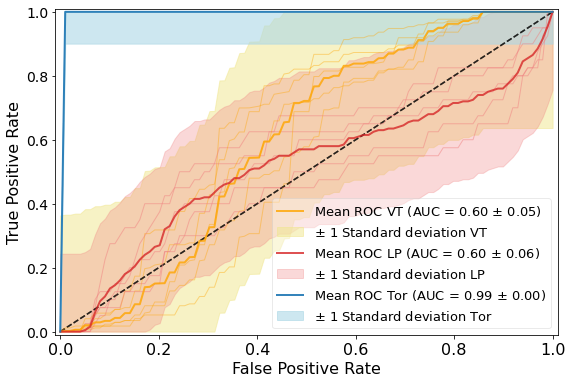

<Figure size 432x432 with 0 Axes>

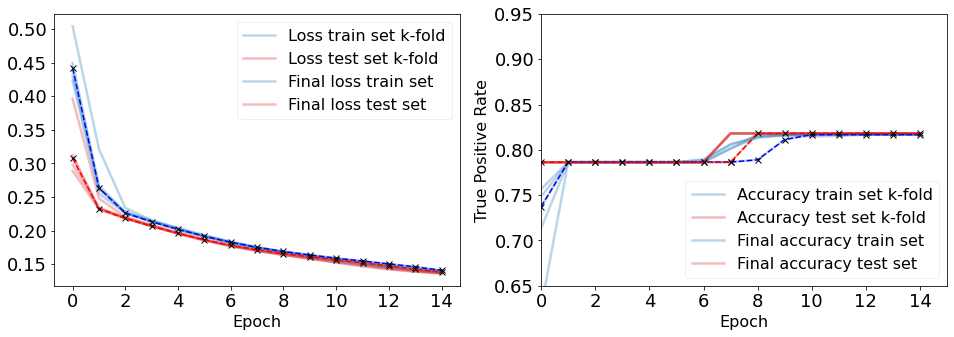

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle



print(cv)
StratifiedShuffleSplit(n_splits=5, random_state=True)

fig, ax = plt.subplots(1, figsize = (9, 6))
tprs_mean_0 = []
tprs_mean_1 = []
tprs_mean_2 = []
aucs_0 = []
aucs_1 = []
aucs_2 = []
fold = 1

for train_index, test_index in cv.split(X, y_label):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  

  dim_entrada = X.shape[1]      
  entrada = Input(shape=(dim_entrada,))
  x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
  x = Dropout(0.25)(x)
  x = Dense(100, activation='relu')(x)
  x = Dropout(0.25)(x)
  saida = Dense(3, activation='softmax')(x)

  
  clasificador = Model(inputs=entrada, outputs=saida)
  clasificador.compile(optimizer='adam', loss='mae', metrics=['categorical_accuracy'])
  historia = clasificador.fit(X_train, y_train,    
                           epochs=15,
                           batch_size=250,
                           validation_data=(X_test, y_test),    
                           shuffle=True)
  
  print(" ENTRENAMIENTO EN EL FOLD %0.2f" %(fold))
  y_pred = clasificador.predict(X_test)
  
  tprs = []
  Corte = []
  
  base_fpr = np.linspace(0, 1, 101)
  mean_fpr = np.linspace(0, 1, 100)


  #Curva ROC para la clase VT

  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 0],  y_pred[:,0])
    auc1 = roc_auc_score(y_test[:, 0], y_pred[:, 0])

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_0.append(auc1)

  Corte.append(th[np.argmax(tpr - fpr)])
  ax.plot([0, 1], [0, 1], linestyle="--", lw=1.5, color="k",  
          alpha=0.3)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="orange",
      lw=1,
      alpha=0.4,
  )
  tprs_mean_0.append(mean_tpr)

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.xlabel('False Positive Rate', fontsize=16)


  #Curva ROC para la clase LP

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 1],  y_pred[:, 1])
    auc1 = roc_auc_score(y_test[:, 1], y_pred[:, 1])

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_1.append(auc1)

  Corte.append(th[np.argmax(tpr - fpr)])

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="lightcoral",
      lw=1,
      alpha=0.5, # alpha es transparencia 
  )
  tprs_mean_1.append(mean_tpr)

  #Curva ROC para la clase Tor
  
  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 2],  y_pred[:, 2])
    auc1 = roc_auc_score(y_test[:, 2], y_pred[:, 2])

  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_2.append(auc1)

  Corte.append(th[np.argmax(tpr - fpr)])

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="lightblue",
      lw=1,
      alpha=0.4,
  )
 
  tprs_mean_2.append(mean_tpr)
  ax.legend(loc="lower right",fontsize = 8)
  plt.xticks(fontsize=16), plt.yticks(fontsize=14)


  import matplotlib.pyplot as plt
  plt.figure(5, figsize=(16,5))
  plt.subplot(1,2,1)
  plt.plot(historia.history["loss"], color='tab:blue', alpha = 0.3, lw = 2.5)   
  plt.plot(historia.history["val_loss"], color='tab:red', alpha = 0.3, lw = 2.5)
  plt.subplot(1,2,2)
  plt.plot(historia.history["categorical_accuracy"], color='tab:blue', alpha = 0.3, lw = 2.5)
  plt.plot(historia.history["val_categorical_accuracy"], color='tab:red', alpha = 0.3, lw = 2.5)
  
  
  fold = fold + 1  


for train, test in cv.split(X, y_label):
  print('train -  {}   |   test -  {}'.format(
      np.bincount(y_label[train]), np.bincount(y_label[test])))

plt.figure(3, figsize=(6,6))
tpr_0_final = np.mean(tprs_mean_0, axis=0)
std_tpr_0 = np.std(tpr_0_final, axis=0)
tprs_upper_0 = np.minimum(tpr_0_final + std_tpr_0, 1)
tprs_lower_0 = np.maximum(tpr_0_final - std_tpr_0, 0)

tpr_0_final[-1] = 1.0
mean_auc_0 = auc(mean_fpr, tpr_0_final)
std_auc_0 = np.std(aucs_0)
ax.plot(
    mean_fpr,
    tpr_0_final,
    color="orange",
    label=r"Mean ROC VT (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_0, std_auc_0),
    lw=2,
    alpha=0.8,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_0,
    tprs_upper_0,
    color="khaki",
    alpha=0.5,
    label="$\pm$ 1 Standard deviation VT",
)

tpr_1_final = np.mean(tprs_mean_1, axis=0)
std_tpr_1 = np.std(tpr_1_final, axis=0)
tprs_upper_1 = np.minimum(tpr_1_final + std_tpr_1, 1)
tprs_lower_1 = np.maximum(tpr_1_final - std_tpr_1, 0)

tpr_1_final[-1] = 1.0
mean_auc_1 = auc(mean_fpr, tpr_0_final)
std_auc_1 = np.std(aucs_1)
ax.plot(
    mean_fpr,
    tpr_1_final,
    color="tab:red",
    label=r"Mean ROC LP (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_1, std_auc_1),
    lw=2,
    alpha=0.8,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_1,
    tprs_upper_1,
    color="lightcoral",
    alpha=0.3,
    label="$\pm$ 1 Standard deviation LP",
)

tpr_2_final = np.mean(tprs_mean_2, axis=0)
std_tpr_2 = np.std(tpr_2_final, axis=0)
tprs_upper_2 = np.minimum(tpr_2_final + std_tpr_2, 1)
tprs_lower_2 = np.maximum(tpr_2_final - std_tpr_2, 0)

tpr_2_final[-1] = 1.0
mean_auc_2 = auc(mean_fpr, tpr_2_final)
std_auc_2 = np.std(aucs_2)
ax.plot(
    mean_fpr,
    tpr_2_final,
    color="tab:blue",
    label=r"Mean ROC Tor (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc_2, std_auc_2),
    lw=2,
    alpha=0.9,
)
ax.fill_between(
    mean_fpr,
    tprs_lower_2,
    tprs_upper_2,
    color="lightblue",
    alpha=0.6,
    label=r"$\pm$ 1 Standard deviation Tor",
)


ax.legend(loc="lower right",fontsize = 13, fancybox=True, framealpha=0.4)
ax.figure.savefig('ROC_LPC.pdf', dpi=400, format='pdf')


plt.figure(5, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], 'xb--',mec='k', lw=1.5) 
plt.plot(historia.history["val_loss"], 'xr--',mec='k', lw=1.5) 
plt.xlabel('Epoch', fontsize=16)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)
plt.legend(labels=["Loss train set k-fold", 
                   "Loss test set k-fold",
                   "Final loss train set", 
                   "Final loss test set"], 
           fontsize='16', fancybox=True, framealpha=0.3)
plt.subplot(1,2,2)
plt.plot(historia.history["categorical_accuracy"], 'xb--',mec='k', lw=1.5) 
plt.plot(historia.history["val_categorical_accuracy"], 'xr--',mec='k', lw=1.5) 
plt.xlim(0, 15)
plt.ylim(0.65, 0.95)
plt.xlabel('Epoch', fontsize=16)
plt.legend(labels=["Accuracy train set k-fold", 
                   "Accuracy test set k-fold",
                   "Final accuracy train set", 
                   "Final accuracy test set"], 
           fontsize='16', fancybox=True, framealpha=0.3, loc='lower right') 
plt.xticks(fontsize=18), plt.yticks(fontsize=18)

plt.savefig('CrossVall_LPC.pdf', dpi=400, format='pdf')

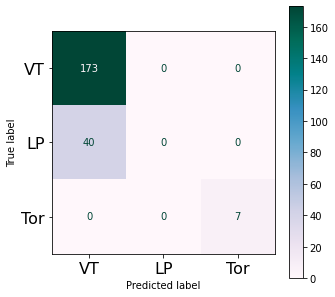

[[[  7  40]
  [  0 173]]

 [[180   0]
  [ 40   0]]

 [[213   0]
  [  0   7]]]
matriz VT  [[  7  40]
 [  0 173]]
matriz LP  [[180   0]
 [ 40   0]]
matriz Tor  [[213   0]
 [  0   7]]


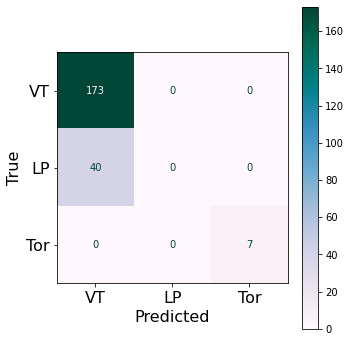

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

y_pred_ = np.rint(y_pred)
y_salida = []
for i in range(len(y_pred)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor') 


y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('True', fontsize=16)
# ax.set_title('Confusion Matrix', fontsize=18)
plt.tight_layout()
plt.savefig('confusion_LPC.pdf', dpi=400, format='pdf')



plt.rcParams.update({'font.size': 16})
# plt.rc('font', **font)

cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)
cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]
print('matriz VT ', cmVT)
print('matriz LP ', cmLP)
print('matriz Tor ', cmTor)

# **Evaluación con Métricas de Desempeño**

In [ ]:
def calcular_sensitividad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FN = CM[1,0]
  sen = 100*(TP/(TP+FN))
  print('Sensitividad ' + clase_sismo + ': {:.1f}%'.format(sen))
  return sen


def calcular_especificidad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TN = CM[0,0]
  FP = CM[0,1]
  esp = 100*(TN/(TN+FP))
  print('Especificidad ' + clase_sismo + ': {:.1f}%'.format(esp))
  return esp


def calcular_precision(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FP = CM[0,1]
  pres = 100*(TP/(TP+FP))
  print('Precisión ' + clase_sismo + ': {:.1f}%'.format(pres))
  return pres


def calcular_f1(sencitividad, precision, clase_sismo):
  f1 = 2*(precision*sencitividad)/(precision+sencitividad)
  print('f1 score ' + clase_sismo + ': {:.1f}%'.format(f1))
  return f1

In [ ]:
# Calculo de Especificidad
esp_1 = calcular_especificidad('VT')
esp_2 = calcular_especificidad('LP')
esp_3 = calcular_especificidad('Tor')
# Cálculo de Sensitividad
sen_1 = calcular_sensitividad('VT')
sen_2 = calcular_sensitividad('LP')
sen_3 = calcular_sensitividad('Tor')
# Cálculo de Precisión
pres_1 = calcular_precision('VT')
pres_2 = calcular_precision('LP')
pres_3 = calcular_precision('Tor')
# Cálculo de f1 score
f1_1 = calcular_f1(sen_1,pres_1,'VT')
f1_2 = calcular_f1(sen_2,pres_2,'LP')
f1_3 = calcular_f1(sen_3,pres_3,'Tor')

Especificidad VT: 14.9%
Especificidad LP: 100.0%
Especificidad Tor: 100.0%
Sensitividad VT: 100.0%
Sensitividad LP: 0.0%
Sensitividad Tor: 100.0%
Precisión VT: 81.2%
Precisión LP: nan%
Precisión Tor: 100.0%
f1 score VT: 89.6%
f1 score LP: nan%
f1 score Tor: 100.0%


<ipython-input-14-d14efc6aa696>:38: RuntimeWarning: invalid value encountered in long_scalars
  pres = 100*(TP/(TP+FP))


In [ ]:
from sklearn.metrics import classification_report
# y_pred_label, y_test_label
target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_test, y_pred_, target_names=target_names))

In [ ]:
print(tprs_mean_0)
print(tpr_0_final)

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00578035,
       0.00578035, 0.01156069, 0.01156069, 0.01156069, 0.01156069,
       0.01156069, 0.01156069, 0.01734104, 0.01734104, 0.02312139,
       0.02312139, 0.02312139, 0.02312139, 0.02312139, 0.04624277,
       0.04624277, 0.0982659 , 0.0982659 , 0.10573948, 0.10848368,
       0.23839552, 0.24113972, 0.29479769, 0.29479769, 0.50289017,
       0.50289017, 0.50867052, 0.50867052, 0.55491329, 0.55491329,
       0.55491329, 0.56647399, 0.56647399, 0.66135342, 0.66409762,
       0.68208092, 0.68208092, 0.7283237 , 0.7283237 , 0.74718281,
       0.74992702, 0.75144509, 0.75144509, 0.79768786, 0.79768786,
       0.83815029, 0.83815029, 0.83815029, 0.83815029, 0.84971098,
       0.84971098, 0.84971098, 0.85549133, 0.85549133, 0.86705202,
       0.86705202, 0.86705202, 0.86705202, 0.86705202, 0.86705202,
       0.87283237, 0.87283237, 0.87861272, 0.87861272, 0.9421

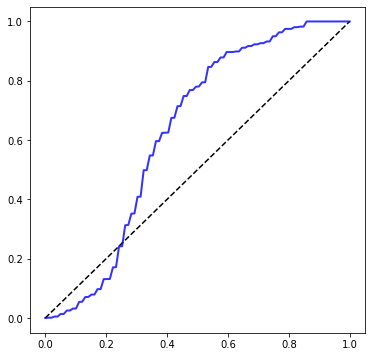

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
#mean_tpr = np.mean(tprs, axis=0)
tpr_0_final[-1] = 1.0
mean_auc = auc(mean_fpr, tpr_0_final)
#std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    tpr_0_final,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# Aplicando CV Estratrificado en la clasificación junto con la ROC

StratifiedShuffleSplit(n_splits=6, random_state=True, test_size=None,
            train_size=None)
TRAIN: [1760 1519  466 ... 2181 1023 2117] TEST: [1131 2043 1604 2106 1168 1969 1664 1840  822 2129  349 1447  708 1307
  705  245 1320  474  182 1797 1495 1686  232 1353 2107  702  974  611
 1135  367    5 1174  819 1858  661 1304  317  164 1426  650  352 1543
 1945  792 2016  536 1465 1560 1778  971   28  366  311 2061 2133  623
  601 1655 1156 1684 1575 1191 2121 1402 2014  640 1709 1998 1511  675
  197 1931 1163 1347 1770  754  327 1362 1751 1721  610 1213 1820  414
 1793  617  120  927  223 1759 1523  165 1187  565  761 2137   19 1269
 1220 1072 1977  871 1706 1739 1827  418 1715  526 1384 1416   69 1681
 1098 1439  736  533  667 1370  903 1694  176 1446  658 1344 2038 1154
  186 1255  191  194  636 1178 1823 1583 2192 1171 1813  690 1123 1902
 2125 1216 2126  420 1713 2096  430  802  612  826  976  817 1028 1007
 1578 1209 1259  945  185  774  733 1688  808  595   33 1458 1425 1924


<ipython-input-84-21a6336b7d07>:201: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-84-21a6336b7d07>:206: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


8/8 [==============================] - 1s 32ms/step - loss: 0.1224 - categorical_accuracy: 0.8169 - val_loss: 0.1215 - val_categorical_accuracy: 0.8182
Epoch 2/15
8/8 [==============================] - 0s 12ms/step - loss: 0.1224 - categorical_accuracy: 0.8169 - val_loss: 0.1215 - val_categorical_accuracy: 0.8182
Epoch 3/15
8/8 [==============================] - 0s 13ms/step - loss: 0.1224 - categorical_accuracy: 0.8169 - val_loss: 0.1215 - val_categorical_accuracy: 0.8182
Epoch 4/15
8/8 [==============================] - 0s 13ms/step - loss: 0.1224 - categorical_accuracy: 0.8169 - val_loss: 0.1215 - val_categorical_accuracy: 0.8182
Epoch 5/15
8/8 [==============================] - 0s 12ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 6/15
8/8 [==============================] - 0s 13ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 7/15
8/8 [=================

<ipython-input-84-21a6336b7d07>:201: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-84-21a6336b7d07>:206: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


8/8 [==============================] - 1s 33ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 2/15
8/8 [==============================] - 0s 12ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 3/15
8/8 [==============================] - 0s 13ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 4/15
8/8 [==============================] - 0s 12ms/step - loss: 0.1222 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 5/15
8/8 [==============================] - 0s 13ms/step - loss: 0.1222 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 6/15
8/8 [==============================] - 0s 12ms/step - loss: 0.1222 - categorical_accuracy: 0.8169 - val_loss: 0.1213 - val_categorical_accuracy: 0.8182
Epoch 7/15
8/8 [=================

<ipython-input-84-21a6336b7d07>:201: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-84-21a6336b7d07>:206: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


TRAIN: [ 670 1652 1709 ...    8 1069  391] TEST: [1331  765 2166  335 1160  382  980  162  232 1823  744 1332 2136 2143
 1145  646  266  163  937 1393  808 1211  669 1898  967 1982  512  589
  611 1914 2147 1628 1948  889  138 1010   40 1821 2069  361 1612 2041
  436  599 1403  167 1133  401  731 1966 1310 1087  532 1123 1629 1387
  412  866  212 1367 1872  624 1451  362 1649  644 1544  291   44 2155
 1588  555  497 1509  661 1066   38  427 1247  304 1626  918  593 1969
 1660  355  182 1663  346 1177  407 1936  294  818  341 2168 1371  249
 1013  695 2188  380 1723 1718  317  715  767 1319  711 1564   83 1973
 2089  850 1093 1068 1827 1195 1320  329  984  500 2050 1921 1051  322
  147 1254  120 1307 1560 1662  570 1944  853 1250  569  645 1771  734
 1892  471  746  240 1097 1357 2113    1 1960  476  414 1011 1023  323
 1473  113  160  513 1296 1919  894  747 1931 1071  699 1684  951  887
  975  499   78 1659 1116  274  639 2144 1594   10 2071 1533 1661  858
  241 1220   51 1460 1061  9

<ipython-input-84-21a6336b7d07>:201: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-84-21a6336b7d07>:206: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


8/8 [==============================] - 1s 33ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 2/15
8/8 [==============================] - 0s 13ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 3/15
8/8 [==============================] - 0s 14ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 4/15
8/8 [==============================] - 0s 12ms/step - loss: 0.1223 - categorical_accuracy: 0.8169 - val_loss: 0.1214 - val_categorical_accuracy: 0.8182
Epoch 5/15
8/8 [==============================] - 0s 12ms/step - loss: 0.1222 - categorical_accuracy: 0.8169 - val_loss: 0.1213 - val_categorical_accuracy: 0.8182
Epoch 6/15
8/8 [==============================] - 0s 17ms/step - loss: 0.1222 - categorical_accuracy: 0.8169 - val_loss: 0.1213 - val_categorical_accuracy: 0.8182
Epoch 7/15
8/8 [=================

<ipython-input-84-21a6336b7d07>:201: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-84-21a6336b7d07>:206: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]
train -  [1555  362   60]   |   test -  [173  40   7]


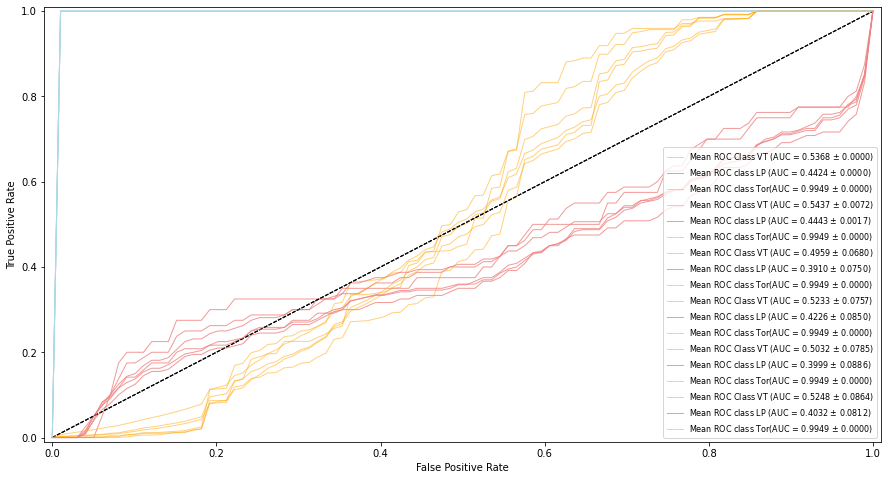

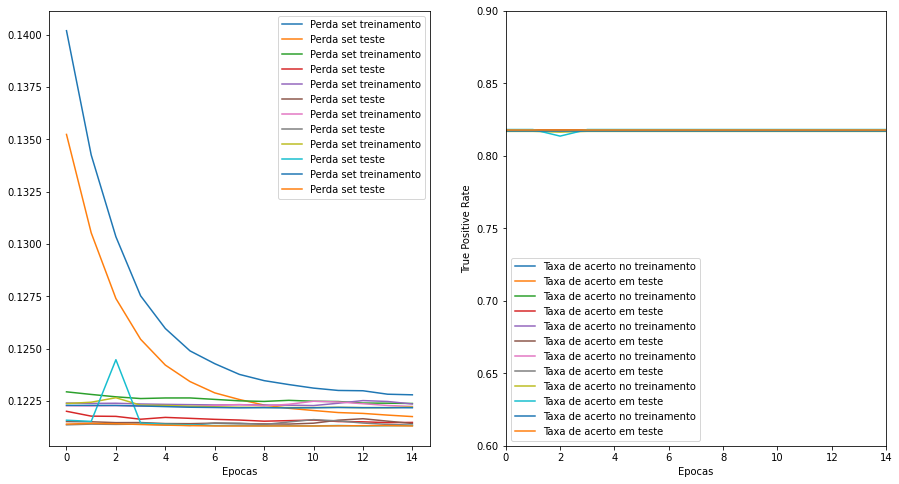

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

#cv.get_n_splits(X, y_label)

print(cv)
StratifiedShuffleSplit(n_splits=6, random_state=True)

fig, ax = plt.subplots(figsize = (15, 8))
tprs0 = []
aucs0 = []
Corte0 = []
tprs1 = []
aucs1 = []
Corte1 = []
tprs2 = []
aucs2 = []
Corte2 = []

for train_index, test_index in cv.split(X, y_label):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  f = 0

  dim_entrada = X.shape[1]      
  entrada = Input(shape=(dim_entrada,))
  x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
  x = Dropout(0.25)(x)
  x = Dense(100, activation='relu')(x)
  x = Dropout(0.25)(x)
  saida = Dense(3, activation='softmax')(x)

  clasificador = Model(inputs=entrada, outputs=saida)
  clasificador.compile(optimizer='adam', loss='mae', metrics=['categorical_accuracy'])
  historia = clasificador.fit(X_train, y_train,    
                           epochs=15,
                           batch_size=250,
                           validation_data=(X_test, y_test),    
                           shuffle=True)
  y_pred = clasificador.predict(X_test)
  
  #fig, ax2 = plt.subplots()
  #base_fpr = np.linspace(0, 1, 101)
  #mean_fpr = np.linspace(0, 1, 100)


  #Curva ROC para la clase VT
  base_fpr0 = np.linspace(0, 1, 101)
  mean_fpr0 = np.linspace(0, 1, 100) # duda, Solo son cien valores entre 0 y 1?

  for i in range(len(y_pred)):
    fpr0, tpr0, th0 = roc_curve(y_test[:, 0],  y_pred[:,0])
    auc0 = roc_auc_score(y_test[:, 0], y_pred[:, 0])

  interp_tpr0 = np.interp(mean_fpr0, fpr0, tpr0)
  interp_tpr0[0] = 0.0
  tprs0.append(interp_tpr0)
  aucs0.append(auc0)

    
  Corte0.append(th0[np.argmax(tpr0 - fpr0)])


  ax.plot([0, 1], [0, 1], linestyle="--", lw=1, color="k",  
          alpha=0.5)
  
  #last_tprs0 = tprs0[f][:]
  #last_aucs0 = aucs0[f][:]
  #last_tprs0.ravel().tolist()
  #last_aucs0.tolist()
  mean_tpr0 = np.mean(tprs0, axis=0) # tienen que ser los ultimos 100
  mean_tpr0[-1] = 1.0
  mean_auc0 = auc(mean_fpr0, mean_tpr0)
  #std_auc0 = np.std(last_aucs0) # tienen que ser solo los últimos 100
  std_auc0 = np.std(aucs0)
  ax.plot(
      mean_fpr0,
      mean_tpr0,
      color="orange",
      label=r"Mean ROC Class VT (AUC = %0.4f $\pm$ %0.4f)" % (mean_auc0, std_auc0),
      lw=1,
      alpha=0.5,
  )

  #std_tpr = np.std(tprs, axis=0)
  #tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  #tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  #ax.fill_between(
      #mean_fpr,
      #tprs_lower,
      #tprs_upper,
      #color="wheat",
      #alpha=0.2,
      #label=r"$\pm$ 1 Standard deviation",
  #)

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')


  #Curva ROC para la clase LP
  base_fpr1 = np.linspace(0, 1, 101)
  mean_fpr1 = np.linspace(0, 1, 100)
 
  for i in range(len(y_pred)):
    fpr1, tpr1, th1 = roc_curve(y_test[:, 1],  y_pred[:, 1])
    auc1 = roc_auc_score(y_test[:, 1], y_pred[:, 1])

  interp_tpr1 = np.interp(mean_fpr1, fpr1, tpr1)
  interp_tpr1[0] = 0.0
  tprs1.append(interp_tpr1)
  aucs1.append(auc1)

  Corte1.append(th1[np.argmax(tpr1 - fpr1)])

  #last_tprs1 = tprs1[f][:]
  #last_aucs1 = aucs1[f][:]
  #last_tprs1.ravel().tolist()
  #last_aucs1.tolist()
  mean_tpr1 = np.mean(tprs1, axis=0)
  mean_tpr1[-1] = 1.0
  mean_auc1 = auc(mean_fpr1, mean_tpr1)
  #std_auc1 = np.std(last_aucs1)
  std_auc1 = np.std(aucs1)
  ax.plot(
      mean_fpr1,
      mean_tpr1,
      color="lightcoral",
      label="Mean ROC class LP (AUC = %0.4f $\pm$ %0.4f)" % (mean_auc1, std_auc1),
      lw=1,
      alpha=0.8, # alpha es transparencia 
  )

  #std_tpr = np.std(tprs, axis=0)
  #tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  #tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  #ax.fill_between(
      #mean_fpr,
      #tprs_lower,
      #tprs_upper,
      #color="gray",
      #alpha=0.2,
      #label="$\pm$ 1 Standard deviation",
  #)

  #Curva ROC para la clase Tor
  base_fpr2 = np.linspace(0, 1, 101)
  mean_fpr2 = np.linspace(0, 1, 100)

  for i in range(len(y_pred)):
    fpr2, tpr2, th2 = roc_curve(y_test[:, 2],  y_pred[:, 2])
    auc2 = roc_auc_score(y_test[:, 2], y_pred[:, 2])

  interp_tpr2 = np.interp(mean_fpr2, fpr2, tpr2)
  interp_tpr2[0] = 0.0
  tprs2.append(interp_tpr2)
  aucs2.append(auc2)

  Corte2.append(th2[np.argmax(tpr2 - fpr2)])

  #last_tprs2 = tprs2[f][:]
  #last_aucs2 = aucs2[f][:]
  #last_tprs2.ravel().tolist()
  #last_aucs2.tolist()
  mean_tpr2 = np.mean(tprs2, axis=0)
  mean_tpr2[-1] = 1.0
  mean_auc2 = auc(mean_fpr2, mean_tpr2)
  #std_auc2 = np.std(last_aucs2)
  std_auc2 = np.std(aucs2)
  ax.plot(
      mean_fpr2,
      mean_tpr2,
      color="lightblue",
      label="Mean ROC class Tor(AUC = %0.4f $\pm$ %0.4f)" % (mean_auc2, std_auc2),
      lw=1,
      alpha=0.8,
  )

  #std_tpr = np.std(tprs, axis=0)
  #tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  #tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  #ax.fill_between(
      #mean_fpr,
      #tprs_lower,
      #tprs_upper,
      #color="gray",
      #alpha=0.2,
      #label="$\pm$ 1 Standard deviation",
  #)
  ax.legend(loc="lower right",fontsize = 8)
  f = f + 1

  import matplotlib.pyplot as plt
  plt.figure(2, figsize=(15,8))
  plt.subplot(1,2,1)
  plt.plot(historia.history["loss"], label="Perda set treinamento")
  plt.plot(historia.history["val_loss"], label="Perda set teste")
  plt.xlabel('Epocas')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(historia.history["categorical_accuracy"], label="Taxa de acerto no treinamento")
  plt.plot(historia.history["val_categorical_accuracy"], label="Taxa de acerto em teste")
  plt.xlim(0, 14)
  plt.ylim(0.6, 0.9)
  plt.xlabel('Epocas')
  plt.legend()

for train, test in cv.split(X, y_label):
  print('train -  {}   |   test -  {}'.format(
      np.bincount(y_label[train]), np.bincount(y_label[test])))

In [ ]:
aucs0

[0.5948837781330709]

In [ ]:
mean_fpr0

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
#print(tprs0)
print(mean_tpr0)
f = 0
#tprs0[f][:]
m = np.mean(tprs0[f][:])

0.5522522917031587


In [ ]:
tprs1

[array([0.   , 0.   , 0.   , 0.   , 0.   , 0.025, 0.05 , 0.05 , 0.05 ,
        0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.1  , 0.125,
        0.125, 0.125, 0.15 , 0.15 , 0.175, 0.2  , 0.2  , 0.225, 0.325,
        0.325, 0.325, 0.325, 0.35 , 0.375, 0.4  , 0.4  , 0.4  , 0.425,
        0.45 , 0.45 , 0.45 , 0.45 , 0.475, 0.5  , 0.5  , 0.5  , 0.5  ,
        0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.525, 0.525, 0.525, 0.55 ,
        0.55 , 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575, 0.575,
        0.6  , 0.6  , 0.625, 0.65 , 0.65 , 0.7  , 0.7  , 0.7  , 0.7  ,
        0.7  , 0.7  , 0.7  , 0.7  , 0.7  , 0.7  , 0.725, 0.725, 0.725,
        0.725, 0.725, 0.725, 0.725, 0.725, 0.75 , 0.75 , 0.825, 0.825,
        0.825, 0.85 , 0.85 , 0.875, 0.875, 0.875, 0.9  , 0.9  , 0.925,
        1.   ])]

In [ ]:
tprs2

[array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [ ]:
# fazendo ciclo for pasra guardar meus y_pred

y_proba = []
for i in range(50):
  # Rodando o classificador
  clasificador = Model(inputs=entrada, outputs=saida)
  clasificador.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
  historia = clasificador.fit(X_train, y_train,    
                           epochs=25,
                           batch_size=150,
                           validation_data=(X_test, y_test),    
                           shuffle=True)
  # gerando meu vetor de predição
  clasificador = Model(inputs=entrada, outputs=saida)
  y_pred = clasificador.predict(X_test)
  y_proba.append(y_pred)




In [ ]:
y_proba[49]

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle


tprs = []
base_fpr = np.linspace(0, 1, 101)

plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal', 'datalim')

# Ciclo for para procurar na hipermatriz de y_proba
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(len(y_proba)):
  for col in range(n_classes):
    fpr[col], tpr[i], _ = roc_curve(y_test[:, col], y_proba[i][:,col])
    roc_auc[col] = auc(fpr[col], tpr[col])
    
 
''' 
  plt.plot(fpr, tpr, 'b', alpha=0.15)
  tpr = np.interp(base_fpr, fpr, tpr)
  tpr[0] = 0.0
  tprs.append(tpr)

  tprs = np.array(tprs)
  mean_tprs = tprs.mean(axis=0)
  std = tprs.std(axis=0)

  tprs_upper = np.minimum(mean_tprs + std, 1)
  tprs_lower = mean_tprs - std


plt.plot(base_fpr, mean_tprs, 'c')
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
'''

In [ ]:
fpr

In [ ]:
y_proba[0][:,2]

In [ ]:
y_proba

In [ ]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Perda set treinamento")
plt.plot(historia.history["val_loss"], label="Perda set teste")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Taxa de acerto no treinamento")
plt.plot(historia.history["val_accuracy"], label="Taxa de acerto no teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

clasificador = Model(inputs=entrada, outputs=saida)
y_pred = clasificador.predict(X_test)

y_pred_ = np.rint(y_pred)

y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

y_salida = []
for i in range(len(y_pred_)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor')

# Matriz de confusión multiclase
c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None )
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.show()

plt.show()

print(c)
cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)

cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]

**Sensitividad y Especificidad**



*   Verdaderos Positivos (TP): La clase de sismo de interés que ha sido clasificada correctamente, 
*   Falsos negativos (FN): La clase de sismo de interés que fue clasificada como otro tipo de sismo,
*   Verdadero negativo (TN): Otros tipo de sismo que fue correctamente clasificado como un tipo de sismo diferente a la clase de interés, y
*   Falsos positivos (FP): cuando un sismo diferente fue clasificado como si fuera el simo de la clase de interés.

La ** sensitividad** mide la proporción de los sismos de interés detectados correctamente, una sensitividad del 100% detectará todos los sismos de interés:

$$Sensitividad = \dfrac{TP}{TP+FN}$$

La **especificidad** mide la proporción de otro tipo de sismos que fueron detectados correctamente diferentes a la clase de interés. Una especificidad del 100% detectará sismos diferentes a la clase de interés:
$$Especificidad = \dfrac{TN}{TN+FP}$$

In [ ]:
def calcular_sensitividad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FN = CM[1,0]
  sen = 100*(TP/(TP+FN))
  print('Sensitividad ' + clase_sismo + ': {:.1f}%'.format(sen))
  return sen


def calcular_especificidad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TN = CM[0,0]
  FP = CM[0,1]
  esp = 100*(TN/(TN+FP))
  print('Especificidad ' + clase_sismo + ': {:.1f}%'.format(esp))
  return esp


def calcular_precision(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FP = CM[0,1]
  pres = 100*(TP/(TP+FP))
  print('Precisión ' + clase_sismo + ': {:.1f}%'.format(pres))
  return pres  


def calcular_f1(sencitividad, precision, clase_sismo):
  f1 = 2*(precision*sencitividad)/(precision+sencitividad)
  print('f1 score ' + clase_sismo + ': {:.1f}%'.format(f1))
  return f1  

In [ ]:
# Calculo de Especificidad
esp_1 = calcular_especificidad('VT')
esp_2 = calcular_especificidad('LP')
esp_3 = calcular_especificidad('Tor')

# Cálculo de Sensitividad
sen_1 = calcular_sensitividad('VT')
sen_2 = calcular_sensitividad('LP')
sen_3 = calcular_sensitividad('Tor')

# Cálculo de Precisión
pres_1 = calcular_precision('VT')
pres_2 = calcular_precision('LP')
pres_3 = calcular_precision('Tor')

# Cálculo de f1 score
f1_1 = calcular_f1(sen_1,pres_1,'VT')
f1_2 = calcular_f1(sen_2,pres_2,'LP')
f1_3 = calcular_f1(sen_3,pres_3,'Tor')

In [ ]:
from sklearn.metrics import classification_report
# y_pred_label, y_test_label
target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_test, y_pred_, target_names=target_names))

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [ ]:
fpr

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="darkgreen", #deeppink
    linestyle="--",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="mediumseagreen", #
    linestyle="--",
    linewidth=2,
)

colors = cycle(["tab:orange", "indianred", "tab:blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

# **Código alternativo para las gráficas ROC**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

''' 
Definiendo funciones
'''

def calculate_tpr_fpr(y_test_label, y_pred_label):
  cm = confusion_matrix(df_aux['class'], df_aux['prob'])
  TN = cm[0, 0]
  FP = cm[0, 1]
  FN = cm[1, 0]
  TP = cm[1, 1]

  # Calcula tpr y fpr
  tpr =  TP/(TP + FN) # sensitivity - true positive rate
  fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

  return tpr, fpr



def get_all_roc_coordinates(etiquetas, y_probab):
    
    # Calcula todas las coordenadas de la curva ROC (tpr y fpr) considerando cada punto como un umbral para la predicción de la clase.
    
    # Args:
        # etiquetas: La lista o serie con las etiquetas de las clases reales.
        # y_probab: El arreglo con las probabilidades para cada clase, obtenido usando el método `clasificador.predict(X_test)`.
        
    # Returns:
        # tpr_list: la lista de TPR que representan cada umbral.
        # fpr_list: la lista de FPR que representa cada umbral.
    
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_probab)):
        threshold = y_probab[i]
        y_predict = y_probab >= threshold
        tpr, fpr = calculate_tpr_fpr(etiquetas, y_predict)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    
    # grafica la curva ROC utilizando la lista de coordenadas (tpr y fpr).
    
    # Args:
        # tpr: La lista de TPR que representan cada coordenada.
        # fpr: La lista de FPR que representan cada coordenada.
        # scatter: Cuando es Verdadero, los puntos utilizados en el cálculo se trazarán con la línea (predeterminado = Verdadero).
    
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
from numpy.ma.core import concatenate
y_array = []
for i in range(len(y_train)):
  if y_vector[i,0] > 0:
    y_array.append('VT')
  if y_vector[i,1] > 0:
    y_array.append('LP')
  if y_vector[i,2] > 0:
    y_array.append('Tor')
i = i + 1
df = pd.DataFrame({'class': y_array})


y_clas = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_clas.append('VT')
  if y_test[i,1] > 0:
    y_clas.append('LP')
  if y_test[i,2] > 0:
    y_clas.append('Tor')

i = i + 1
df_class = pd.DataFrame({'class': y_clas})

y = df['class']
y_class = df_class['class']

X_test = pd.DataFrame(X_test)

print(y_class)
print(y)


0      LP
1      VT
2      VT
3      VT
4      VT
       ..
297    VT
298    VT
299    LP
300    VT
301    VT
Name: class, Length: 302, dtype: object
0        VT
1        VT
2        VT
3        VT
4        VT
       ... 
1890    Tor
1891    Tor
1892    Tor
1893    Tor
1894    Tor
Name: class, Length: 1895, dtype: object


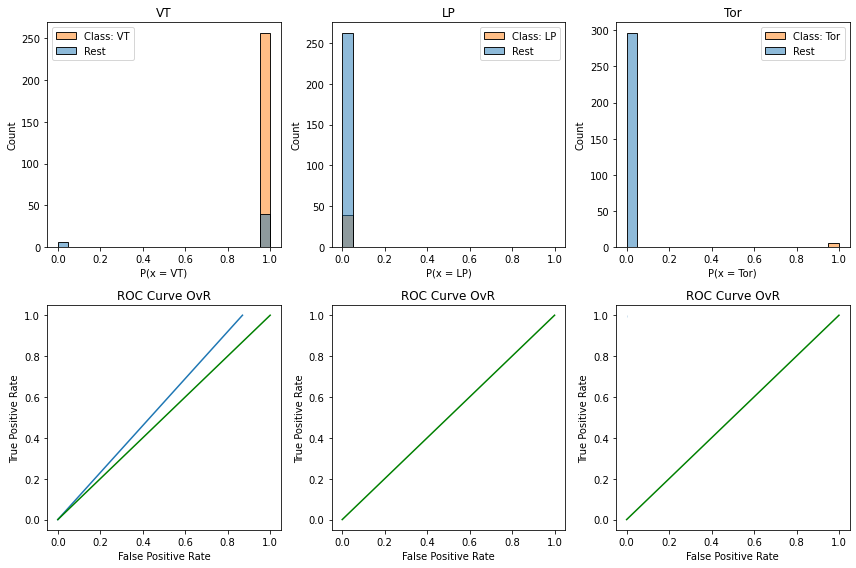

In [ ]:
#classes = model_multiclass.classes_
classes = np.array(['VT', 'LP', 'Tor'], dtype=object)
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_class]
    df_aux['prob'] = y_pred_[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [ ]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_pred, labels = classes, multi_class = 'ovr', average = 'macro')

VT ROC AUC OvR: 0.5652
LP ROC AUC OvR: 0.5000
Tor ROC AUC OvR: 1.0000
average ROC AUC OvR: 0.6884


0.6725043690881182